In [4]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Facial feature extraction without time series

## Data extraction

In [2]:
path = "/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/"

# List all the .csv files in the folder
mix_emo_files = glob.glob(path + "/*.csv")

mix_emo_dfs = []
num_deleted = 0

for filename in mix_emo_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    

    # check the ratio of rows with confidence >= 0.98 to the total number of rows
    if len(df[df["confidence"]<0.98])/len(df) >= 0.15:
        # print the filename and delete the df variable
        print(filename)
        del df
        num_deleted += 1
    else:
        # select confidence >= 0.98 & success = 1
        df = df.loc[(df["confidence"]>= 0.98) & (df["success"]== 1 ) ] 
        # drop columns that does not contain facial feature information
        df = df.drop(columns=["confidence","success","frame", "face_id", "timestamp"])
        
        # drop binary AU features
        cols_to_drop = df.filter(regex='AU.*_c').columns

        
        df = df.drop(columns=cols_to_drop)

        df = df.fillna(method='ffill') # forward fill missing values
        df = df.fillna(method='bfill') # backward fill missing values
            
        mix_emo_dfs.append(df)
        
print(f"{num_deleted} dataframes were deleted.")

print(len(mix_emo_dfs))

/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A404_mix_ang_fea_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A411_mix_fea_hap_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A417_mix_fea_hap_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A220_mix_disg_fea_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A220_mix_fea_sad_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A427_mix_ang_sad_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A410_mix_disg_sad_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A413_mix_disg_fea_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A64_mix_ang_fea_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A408_mix_disg_sad_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A410_mix_ang_hap_7030.csv
/Users/jiachenyao/Desktop/The

/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A327_mix_ang_hap_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A64_mix_fea_hap_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A405_mix_ang_hap_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A404_mix_disg_fea_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A411_mix_hap_sad_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A410_mix_ang_hap_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A427_mix_disg_fea_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A417_mix_ang_fea_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A64_mix_ang_fea_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A435_mix_disg_hap_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A334_mix_ang_hap_7030.csv
/Users/jiachenyao/Desktop/Thesi

/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A410_mix_hap_sad_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A434_mix_fea_hap_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A410_mix_disg_fea_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A55_mix_ang_hap_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A410_mix_fea_sad_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A404_mix_ang_sad_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A220_mix_disg_sad_7030.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A64_mix_disg_hap_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A437_mix_hap_sad_5050.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A427_mix_hap_sad_3070.csv
/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/A405_mix_disg_sad_5050.csv
/Users/jiachenyao/Desktop/Thes

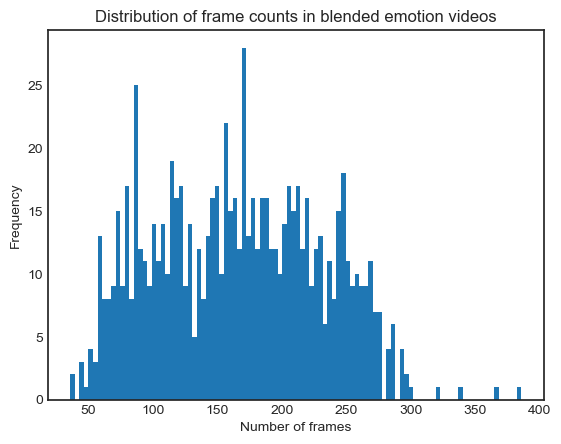

In [5]:
# Plotting histogram of length of dataframes
dfs_len = [len(df) for df in mix_emo_dfs]
plt.style.use('seaborn-white')
plt.hist(dfs_len, bins=100)

# Adding labels and caption
plt.xlabel('Number of frames')
plt.ylabel('Frequency')
plt.title('Distribution of frame counts in blended emotion videos')
plt.show()

In [3]:
#Extract functional features
mix_emo_functional_features_results = []

for df, file in zip(mix_emo_dfs, mix_emo_files):

    # Extract filename from filepath
    filename = os.path.basename(file)
    #print(filename)
    means = df.mean()

    result = pd.concat([means], axis=1)    

    # Rename columns with filename as prefix
    prefix = filename[:-4] # remove ".csv" extension
    result.columns = [f"{prefix}_mean"]


    mix_emo_functional_features_results.append(result)
print(len(mix_emo_functional_features_results))

839


In [4]:
# Concate results to a single dataframe
mix_emo_facial_no_time_series_output = pd.concat(mix_emo_functional_features_results, axis=1)
mix_emo_facial_no_time_series_output = mix_emo_facial_no_time_series_output.T
mix_emo_facial_no_time_series_output = mix_emo_facial_no_time_series_output.reset_index().rename(columns={'index': 'dataname'})
mix_emo_facial_no_time_series_output.fillna(0,inplace=True)

In [5]:
mix_emo_facial_no_time_series_output

,dataname,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A323_mix_disg_fea_5050_mean,0.060082,0.126157,-0.969005,-0.170499,0.140180,-0.954620,-0.059496,0.139815,910.197308,...,1.257308,0.785269,0.823346,0.657692,0.499962,0.838808,0.006462,0.052423,0.608808,0.295115
1,A207_mix_ang_fea_3070_mean,-0.007758,0.260592,-0.964318,0.000094,0.322842,-0.946165,-0.004043,0.296383,881.214894,...,1.083191,0.127447,0.278936,0.159574,1.034681,0.249149,0.592340,1.153830,1.725532,0.018298
2,A404_mix_ang_fea_5050_mean,0.053540,0.221824,-0.969220,-0.208185,0.223772,-0.948546,-0.080536,0.228375,999.295238,...,1.582202,0.016310,0.222083,1.304821,1.139107,0.399405,0.073571,0.901190,0.399107,0.730179
3,A411_mix_fea_hap_3070_mean,0.135708,0.229591,-0.961163,-0.028382,0.221021,-0.973463,0.055529,0.228782,745.390805,...,2.657471,2.785402,2.039080,0.000000,0.060230,0.000000,0.410575,2.128736,0.872529,0.291034
4,A417_mix_fea_hap_7030_mean,-0.067035,0.216995,-0.960520,-0.161814,0.268129,-0.941027,-0.119921,0.249556,869.844444,...,3.193228,3.770053,1.291534,0.090000,0.000000,0.476455,0.096508,3.098942,0.099471,0.048254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,A102_mix_disg_sad_7030_mean,0.096192,0.174036,-0.977575,-0.116035,0.219767,-0.964752,-0.010588,0.200196,840.143243,...,1.700878,2.860473,0.006419,0.328514,0.920878,0.071892,0.012973,2.139932,0.865946,1.341824
835,A327_mix_hap_sad_3070_mean,0.147669,0.258430,-0.952661,-0.102547,0.252401,-0.960490,0.023539,0.260991,862.127826,...,1.850957,0.075130,0.332522,1.495739,0.042783,1.517391,0.000000,2.636957,0.311217,0.470087
836,A438_mix_fea_hap_3070_mean,-0.063424,0.084158,-0.982605,-0.107909,0.129724,-0.977156,-0.087411,0.108826,998.603546,...,0.452163,0.089681,0.351773,1.365887,0.236028,1.067340,0.062660,0.779468,0.251489,0.199610
837,A434_mix_fea_sad_7030_mean,0.074534,0.351677,-0.932586,-0.016038,0.345610,-0.935823,0.031171,0.357221,824.902703,...,2.163784,1.953829,2.032162,0.005586,0.058333,0.280045,0.224414,1.701306,0.910000,0.313153


## Preprocessing

In [6]:
# ratio
mix_emo_facial_no_time_ratio = mix_emo_facial_no_time_series_output.copy()
mix_emo_facial_no_time_ratio["dataname"] = mix_emo_facial_no_time_ratio["dataname"].str.extract('(mix.*)', expand=False)
mix_emo_facial_no_time_ratio["dataname"] = mix_emo_facial_no_time_ratio["dataname"].str.rsplit('_', 1).str[0]

In [7]:
# no ratio
mix_emo_facial_no_time_noratio = mix_emo_facial_no_time_series_output.copy()
mix_emo_facial_no_time_noratio["dataname"]= mix_emo_facial_no_time_noratio["dataname"].str.extract('(mix.*)', expand=False)
mix_emo_facial_no_time_noratio["dataname"] = mix_emo_facial_no_time_noratio["dataname"].apply(lambda x: '_'.join(x.split('_')[:-2]))

In [9]:
# min-max normalization

# ratio
cols_to_normalize_ratio = mix_emo_facial_no_time_ratio.columns.difference(['dataname'])
#print(len(cols_to_normalize_ratio))
mix_emo_facial_no_time_ratio[cols_to_normalize_ratio] = mix_emo_facial_no_time_ratio[cols_to_normalize_ratio].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# no ratio
cols_to_normalize_noratio = mix_emo_facial_no_time_noratio.columns.difference(['dataname'])
mix_emo_facial_no_time_noratio[cols_to_normalize_noratio] = mix_emo_facial_no_time_noratio[cols_to_normalize_noratio].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [10]:
#save preprocessed files
mix_emo_facial_no_time_ratio.to_csv("/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/mix_emo_facial_no_time_ratio.csv", index=False)

mix_emo_facial_no_time_noratio.to_csv("/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/mix_emo_facial_no_time_noratio.csv", index=False)